<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Павел! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

# Исследование для магазина "В один клик"

Интернет магазин занимается продажей различных товаров, отчёты показывают снижение покупательской активности. Необходимо провести исследование, построить модель и с её помощью предсказать изменение покупательской активности, далее сегментировать покупателей и выработать рекомендации для увеличения покупательской активности.

## Открываем данные

Данные предоставленные заказчиком содержаться в четырёх файлах, в первом общие данные о покупателях, во втором и в третьем данные о времени проведённом на сайте и потраченных деньгах. В четвёртом файле содержится информация о совокупной выручке.

Импортируем все инструменты необходимые для работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
import seaborn as sns
import sklearn
try:
  import shap
except:
  !pip install shap
  import shap

# from holoviews.ipython import display

try:
    import statsmodels
except:
    !pip install statsmodels

from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Ошибка исполнения кода - не все модули установлены!</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'>
Павел, при перезапуске кода на платформе он упал с ошибкой. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Важно также убедиться, что все ячейки проекта исполнились - можно просто пролистать работу до конца и убедиться, что последняя ячейка исполнена. Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)
    
Обрати также внимание, что если твой проект без ошибок работает локально, это не значит, что на платформе будет так же - есть разные окружения, платформа имитирует окружение заказчика, и мы должны обеспечить работоспособность нашего решения на окружении заказчика в первую очередь.

Так же, в начале курса, выдаётся файл для установки копии окружения Практикума, можно поднимать ядро для проверки локально. https://code.s3.yandex.net/data-analyst/da_practicum_env.yml </font>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)
from sklearn.model_selection import GridSearchCV

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем нужные метрики
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

from sklearn.cluster import KMeans

In [3]:
import phik
from phik.report import plot_correlation_matrix

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Но их лучше собрать в одной ячейке и разделить на функциональные группы пустой строкой.</font>

Импорт данных

In [4]:
try:
    market = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
    market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
    market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    market = pd.read_csv('market_file.csv', sep=',', decimal='.')
    market_money = pd.read_csv('market_money.csv', sep=',', decimal='.')
    market_time = pd.read_csv('market_time.csv', sep=',', decimal='.')
    money = pd.read_csv('money.csv', sep=';', decimal=',')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что есть вариативность по источникам загрузки данных!</font>

In [5]:
market.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [6]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [7]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [8]:
money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Шаг 2 Предобработка данных

Проверим данные на наличие дупликатов, пропусков и проверим общее количество данных

Сначала для данных из файла market_data.csv

In [9]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [10]:
market.columns = market.columns.str.replace(' ', '_', regex=True)

In [11]:
# market.rename(columns={'Покупательская активность': 'Покупательская_активность',
                       # 'Тип сервиса': 'Тип_сервиса', 'Разрешить сообщать': 'Разрешить_сообщать'}, inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Пробелы можно заменить прочерком методом replace.</font>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Заменил rename на replace</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [12]:
print(market.nunique())

id                                     1300
Покупательская_активность                 2
Тип_сервиса                               3
Разрешить_сообщать                        2
Маркет_актив_6_мес                       41
Маркет_актив_тек_мес                      3
Длительность                            658
Акционные_покупки                        42
Популярная_категория                      6
Средний_просмотр_категорий_за_визит       6
Неоплаченные_продукты_штук_квартал       11
Ошибка_сервиса                           10
Страниц_за_визит                         20
dtype: int64


In [13]:
print(market['Тип_сервиса'].value_counts())

стандарт     914
премиум      376
стандартт     10
Name: Тип_сервиса, dtype: int64


In [14]:
market.loc[market['Тип_сервиса'] == 'стандартт', 'Тип_сервиса'] = 'стандарт'

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [15]:
print(market['Покупательская_активность'].value_counts())

Прежний уровень    802
Снизилась          498
Name: Покупательская_активность, dtype: int64


In [16]:
print(market.isna().sum())

id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


In [2]:
sklearn.__version__

'1.3.0'

In [17]:
print(market.duplicated().sum())

0


Дупликатов и пропусков нет, данные выглядят прилично. Гистограммы и сатистические свойства посмотрим в исследовательском анализе данных. Целевым признаком является колонка Покупательская_активность, в результате работы нужно будет дать ответ - какова вероятность снижения покупательской активности и дать рекомендации по её снижению. ID не повторяются. В данных, помимо целевого признака, есть ещё строковых записи - Популярная_категория, Тип_сервиса и Разрешить_сообщать. Большую часть даннызх так или иначе можно будет использовать как категориальные так как уникальных значений ограниченное число

Теперь посмотрим что в данных market_money

In [18]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [19]:
print(market_money.nunique())

id         1300
Период        3
Выручка    2776
dtype: int64


In [20]:
print(market_money.isna().sum())

id         0
Период     0
Выручка    0
dtype: int64


In [21]:
print(market_money.duplicated().sum())

0


данных втрое больше чем количество ID в исходном сэте. При этом функция не выявила дупликатов. Необходимо выяснить в чём дело

In [22]:
display(market_money.head(10))

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше выводить метдом `display()`</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Поменял print на display, стало лучше, ограничил вывод by head</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

Всё понятно, для каждого ID имеется 3 записи - препредыдущий_месяц, предыдущий_месяц и текущий_месяц. Преобразуем массив чтобы потом его можно было мёрджить

In [23]:
market_money = market_money.set_index('id')

In [24]:
# df1 = pd.DataFrame()
# df1['препредыдущий_месяц'] = market_money.loc[market_money['Период'] == 'препредыдущий_месяц']['Выручка']
# df2 = pd.DataFrame()
# df2['предыдущий_месяц'] = market_money.loc[market_money['Период'] == 'предыдущий_месяц']['Выручка']
# df3 = pd.DataFrame()
# df3['текущий_месяц'] = market_money.loc[market_money['Период'] == 'текущий_месяц']['Выручка']

In [25]:
pivot = market_money.pivot_table(
    index='id',
    columns='Период',
    values='Выручка',
    aggfunc='sum',
    fill_value=0
)

In [26]:
pivot

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0,3293.1
215349,5216.0,4472,4971.6
215350,5457.5,4826,5058.4
215351,6158.0,4793,6610.4
215352,5807.5,4594,5872.5
...,...,...,...
216643,3664.0,4704,4741.7
216644,4729.0,5299,5353.0
216645,5160.0,5334,5139.2


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Таблицы можно "развернуть вширь" по id  методом pivot_table. Необязательно прописывать каждую колонку.</font>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Использовал pivot_table. Действительно, так удобнее</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

In [27]:
# market_money = pd.concat([df1, df2, df3], axis=1)
market_money = pivot

Теперь выручка записана в разные колонки, ID теперь совпадает

Теперь рассмотрим данные market_time

In [28]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [29]:
print(market_time.nunique())

id        1300
Период       2
минут       20
dtype: int64


In [30]:
print(market_time.isna().sum())

id        0
Период    0
минут     0
dtype: int64


In [31]:
print(market_time.duplicated().sum())

0


Проверим почему данных больше

In [32]:
print(market_time)

          id            Период  минут
0     215348     текущий_месяц     14
1     215348  предыдцщий_месяц     13
2     215349     текущий_месяц     10
3     215349  предыдцщий_месяц     12
4     215350     текущий_месяц     13
...      ...               ...    ...
2595  216645     текущий_месяц     18
2596  216646  предыдцщий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдцщий_месяц     15

[2600 rows x 3 columns]


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше выводить метдом `display()`</font>

Проделаем ту же операцию

In [33]:
market_time = market_time.set_index('id')

In [34]:
# df1 = pd.DataFrame()
# df1['предыдущий_месяц'] = market_time.loc[market_time['Период'] == 'предыдцщий_месяц']['минут']
# df2 = pd.DataFrame()
# df2['текущий_месяц'] = market_time.loc[market_time['Период'] == 'текущий_месяц']['минут']

In [35]:
pivot_time = market_time.pivot_table(
    index='id',
    columns='Период',
    values='минут',
    aggfunc='sum',
    fill_value=0
)

In [36]:
# market_time = pd.concat([df1, df2], axis=1)

In [37]:
market_time = pivot_time

In [38]:
market_time = market_time.rename(columns={'предыдцщий_месяц' : 'предыдущий_месяц_время', 'текущий_месяц' : 'текущий_месяц_время'})

In [39]:
print(market_time)

Период  предыдущий_месяц_время  текущий_месяц_время
id                                                 
215348                      13                   14
215349                      12                   10
215350                       8                   13
215351                      11                   13
215352                       8                   11
...                        ...                  ...
216643                      14                    7
216644                      12                   11
216645                      12                   18
216646                      18                    7
216647                      15                   10

[1300 rows x 2 columns]


Теперь размер данных соответствует основным

Осталось проверить данные из money

In [40]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [41]:
print(money.nunique())

id         1300
Прибыль     400
dtype: int64


In [42]:
print(money.isna().sum())

id         0
Прибыль    0
dtype: int64


In [43]:
print(money.duplicated().sum())

0


In [44]:
print(money)

          id  Прибыль
0     215348     0.98
1     215349     4.16
2     215350     3.13
3     215351     4.87
4     215352     4.21
...      ...      ...
1295  216643     4.44
1296  216644     6.11
1297  216645     3.29
1298  216646     4.03
1299  216647     3.28

[1300 rows x 2 columns]


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Здесь заканчивается структурный блок работы - стоит сделать промежуточные выводы о проделанной работе в блоке.~~</font>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Добавляю выводы</span>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

В результате проведённой предобработки можно сделать следующие выводы:
- Всего имеется 1300 записей
- В общей записи дупликатов и пропусков не найдено, id совпадают
- Данные из market_money и market_time перегруппировали так, чтобы в калонках были данные за текущий, предыдущий и предпредыдущий месяцы. Сами значения будут выручкой и временем соответственно



## Шаг 3 Исследовательский анализ данных

Для того чтобы понять что с данными всё в порядке проведём следующие операции:
- Построим гистограммы для всех признаков
- Про проведём анализ целевого признака
- Выберем покупателей с активностью не менее 3 месяцев

In [45]:
market = market.set_index('id')

In [46]:
print(market)

       Покупательская_активность Тип_сервиса Разрешить_сообщать  \
id                                                                
215348                 Снизилась     премиум                 да   
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
...                          ...         ...                ...   
216643           Прежний уровень    стандарт                 да   
216644           Прежний уровень    стандарт                нет   
216645           Прежний уровень    стандарт                 да   
216646           Прежний уровень    стандарт                 да   
216647           Прежний уровень     премиум                 да   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
id                                                            

array([[<AxesSubplot:title={'center':'Маркет_актив_6_мес'}>,
        <AxesSubplot:title={'center':'Маркет_актив_тек_мес'}>,
        <AxesSubplot:title={'center':'Длительность'}>],
       [<AxesSubplot:title={'center':'Акционные_покупки'}>,
        <AxesSubplot:title={'center':'Средний_просмотр_категорий_за_визит'}>,
        <AxesSubplot:title={'center':'Неоплаченные_продукты_штук_квартал'}>],
       [<AxesSubplot:title={'center':'Ошибка_сервиса'}>,
        <AxesSubplot:title={'center':'Страниц_за_визит'}>,
        <AxesSubplot:>]], dtype=object)

<Figure size 432x288 with 0 Axes>

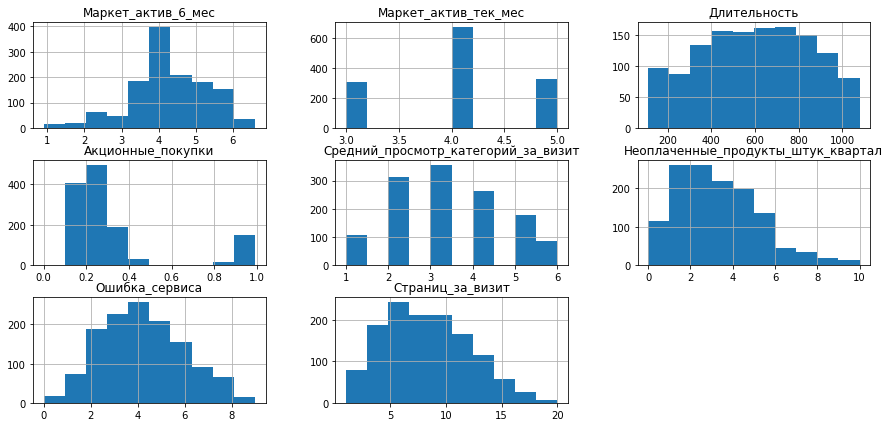

In [47]:
plt.figure()
market.hist(figsize=(15,7))

Распределения выглядят вполне нормально, распределение страниц за визит и неоплаченных продуктов похожи на Релеевское, акционные покупки имеет U shape.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Для нечисленных признаков можно проверить частоты

In [48]:
print(market['Тип_сервиса'].value_counts())

стандарт    924
премиум     376
Name: Тип_сервиса, dtype: int64


In [49]:
print(market['Разрешить_сообщать'].value_counts())

да     962
нет    338
Name: Разрешить_сообщать, dtype: int64


По признакам Тип_сервиса и Разрешить_сообщать есть дисбаланс, нужно будет это учесть

In [50]:
print(market['Популярная_категория'].value_counts())

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64


Рассмотрим целевой признак

In [51]:
print(market['Покупательская_активность'].value_counts())

Прежний уровень    802
Снизилась          498
Name: Покупательская_активность, dtype: int64


Сильного дисбаланса не наблюдается

Теперь проверим money и time

array([[<AxesSubplot:title={'center':'предыдущий_месяц_время'}>,
        <AxesSubplot:title={'center':'текущий_месяц_время'}>]],
      dtype=object)

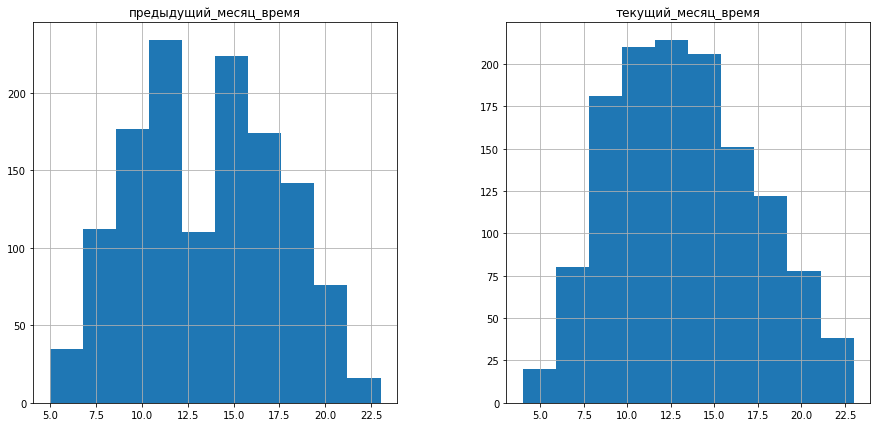

In [52]:
market_time.hist(figsize=(15, 7))

array([[<AxesSubplot:title={'center':'предыдущий_месяц'}>,
        <AxesSubplot:title={'center':'препредыдущий_месяц'}>],
       [<AxesSubplot:title={'center':'текущий_месяц'}>, <AxesSubplot:>]],
      dtype=object)

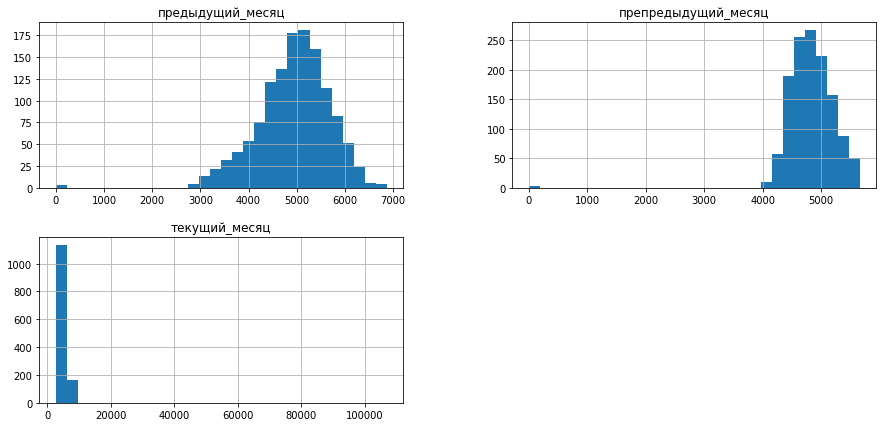

In [53]:
market_money.hist(figsize=(15, 7), bins=30)

In [54]:
market_money.describe()

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,1300.000000,1300.000000,1300.000000
mean,4936.920385,4825.206923,5314.960846
std,739.597997,405.979663,2939.708156
min,0.000000,0.000000,2758.700000
25%,4496.750000,4583.000000,4706.050000
50%,5005.000000,4809.000000,5179.950000
75%,5405.625000,5053.500000,5761.725000
max,6869.500000,5663.000000,106862.200000


Моксимальные данные по текущему месяцу слишком велики, проверим что это за выброс

In [55]:
market_money.loc[market_money['текущий_месяц'] > 10000]

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215380,6077.0,5051,106862.2


Вероятность того что клиент внезапно потратил в 20 раз больше средних значений невелика, лучше присвоить этому значению медианное

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

In [56]:
market_money.loc[market_money['текущий_месяц'] > 10000, 'текущий_месяц'] = market_money['текущий_месяц'].median()

<AxesSubplot:>

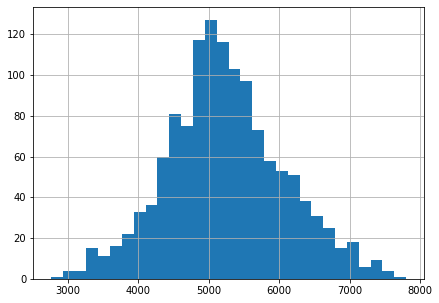

In [57]:
market_money['текущий_месяц'].hist(figsize=(7, 5), bins=30)

<AxesSubplot:>

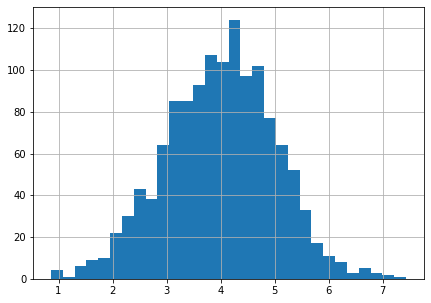

In [58]:
money['Прибыль'].hist(figsize=(7, 5), bins=30)

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Удаляю пользователей</span>

Следует удалить пользователей с отсутствием покупок хотя бы за один из трёх месяцев

In [59]:
market_money.query('(предыдущий_месяц == 0) or (препредыдущий_месяц == 0) or (текущий_месяц == 0)')

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0,3293.1
215357,0.0,0,5986.3
215359,0.0,0,4735.0


In [60]:
market_money.drop(215348, axis=0, inplace=True)

In [61]:
market_money.drop(215357, axis=0, inplace=True)
market_money.drop(215359, axis=0, inplace=True)

In [62]:
market_time.drop(215348, axis=0, inplace=True)
market_time.drop(215357, axis=0, inplace=True)
market_time.drop(215359, axis=0, inplace=True)

In [63]:
market.drop(215348, axis=0, inplace=True)
market.drop(215357, axis=0, inplace=True)
market.drop(215359, axis=0, inplace=True)

In [64]:
money.drop(215348, axis=0, inplace=True)
money.drop(215357, axis=0, inplace=True)
money.drop(215359, axis=0, inplace=True)

KeyError: '[215348] not found in axis'

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span>  ❌\
<span style="color: red"> Ошибка исполнения кода. </span>

In [65]:
market_money.shape

(1297, 3)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Неактивные удалены 👌</font>

Выводы по анализу:
---
Сильных выбросов или неадекватных значений не наблюдается. Распределения либо нормальные либо Релеевские. У признака акционные покупки U образное распределение. В категориальных данных сильный дисбаланс наблюдается у Тип_сервиса и Разрешить_сообщать. Данные по длительности значительно выше в абсолютных значениях. Значения признаков по времени и выручке тоже похожи на нормальные, значения выручки велики в абсолютных значениях. Для данных из money не потребовалось дополнительной обработки

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно удалить пользователей без покупок хотя бы в одном из трёх месяцев, у них активность менее трёх месяцев. Это можно проявить по выручке.~~</font>

## Шаг 4 Объединение таблиц

Объединим все таблицы кроме финансовых показателей

In [65]:
market_all = pd.merge(market, market_money, on='id', how='left')
market_all = pd.merge(market_all, market_time, on='id', how='left')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

In [66]:
market_all

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_время,текущий_месяц_время
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704,4741.7,14,7
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299,5353.0,12,11
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334,5139.2,12,18


Теперь у нас есть единый фрэйм, приступим к анализу

## Шаг 5 Корреляционный анализ

Посчитаем корреляцию используя рекомендованный в уроках phik

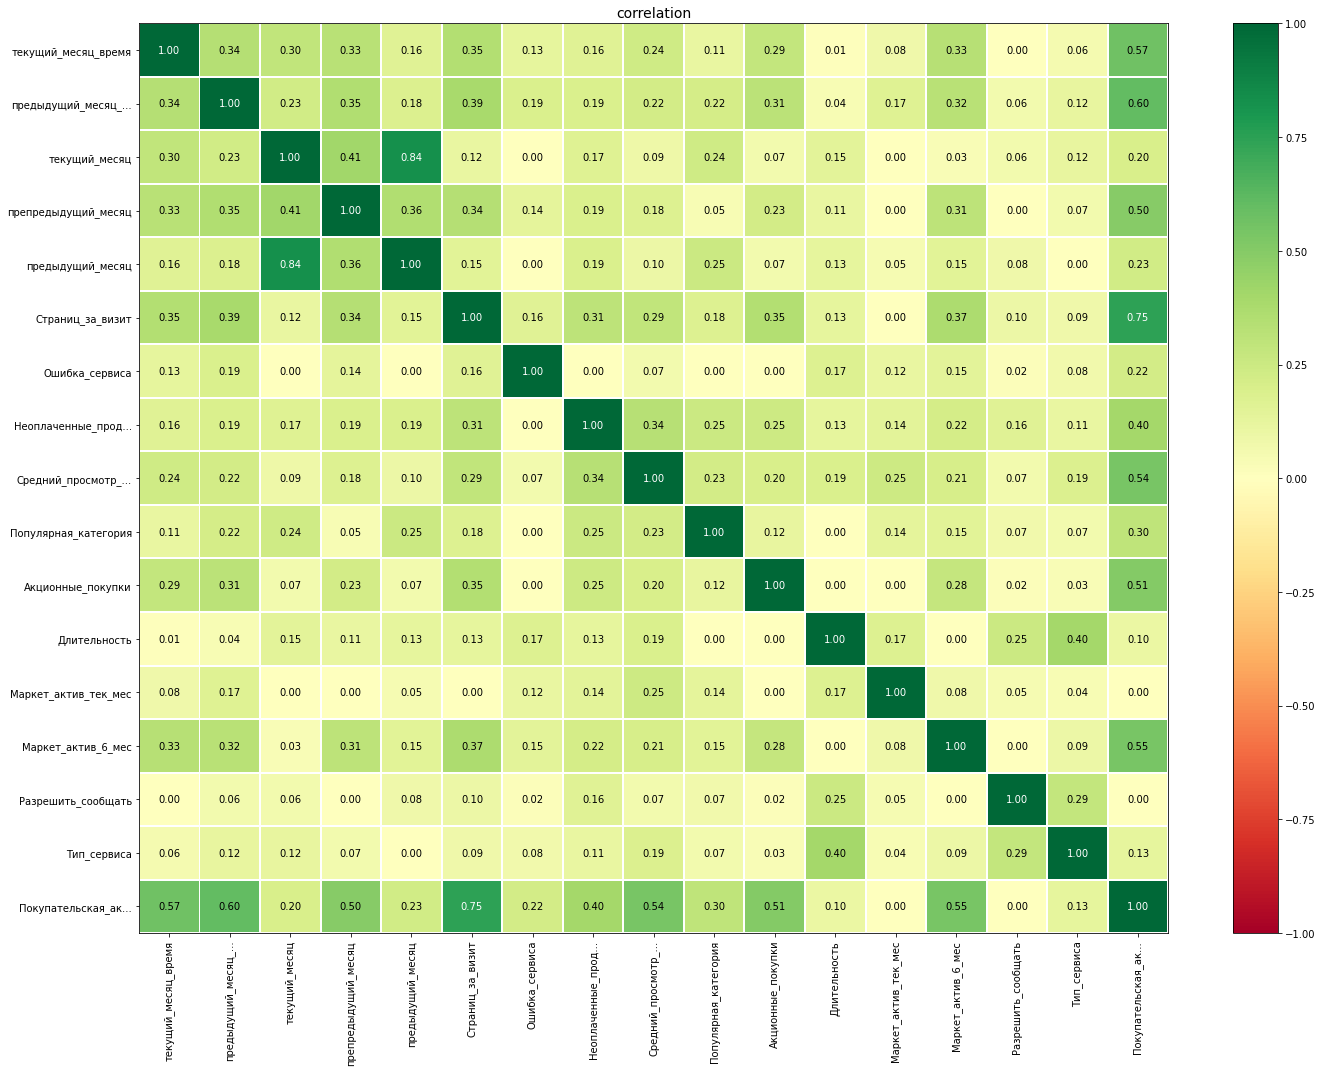

In [67]:
interval_cols = ['Длительность', 'Акционные_покупки', 'Маркет_актив_6_мес', 'препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц',
                 'Маркет_актив_тек_мес', ]
phik_overview = market_all.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 12)
)

Целевой признак - покупательская активность - имеет высокую корреляцию с количеством страниц за визит. Также у целевого признака есть корреляция с  временем проведённым на сайте в текущий и предыдущий месяц, средним просмотром категорий, акционными покупками и маркетинговой активностью за последние 6 месяцев. Мультиколлинеарности

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

## Шаг 6 Использование пайплайнов

### 6.1 ColumnTransformer

Приступим к работе с данными. Для этого разделим данные на тестовую и тренировочную выборки. Зададим скэйлер и энкодер

In [68]:
X = market_all.drop(columns=['Покупательская_активность'])  # Features
y = market_all['Покупательская_активность']  # Target

In [69]:
RANDOM_STATE = 42

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [71]:
X_train

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_время,текущий_месяц_время
id,,,,,,,,,,,,,,,,
215690,стандарт,да,4.8,4,907,0.30,Косметика и аксесуары,2,1,1,6,5005.5,5241,4931.4,13,14
216619,стандарт,нет,3.9,4,140,0.17,Техника для красоты и здоровья,4,2,8,11,5009.5,4342,5718.0,16,17
216631,стандарт,да,3.0,3,455,0.24,Кухонная посуда,5,0,7,7,4582.0,4735,4844.6,17,17
216056,премиум,да,4.6,4,871,0.39,Мелкая бытовая техника и электроника,5,2,2,10,4636.5,5442,4068.4,10,16
215702,стандарт,нет,1.7,4,188,0.89,Товары для детей,2,0,4,2,5078.5,4546,4860.1,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216446,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,0,7,4712.0,5160,5230.7,15,20
216481,премиум,да,4.4,5,862,0.17,Техника для красоты и здоровья,4,4,8,10,4914.0,4872,5007.6,16,20
216645,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334,5139.2,12,18


In [72]:
print(X_train.nunique())

Тип_сервиса                               2
Разрешить_сообщать                        2
Маркет_актив_6_мес                       41
Маркет_актив_тек_мес                      3
Длительность                            593
Акционные_покупки                        41
Популярная_категория                      6
Средний_просмотр_категорий_за_визит       6
Неоплаченные_продукты_штук_квартал       11
Ошибка_сервиса                           10
Страниц_за_визит                         20
предыдущий_месяц                        908
препредыдущий_месяц                     692
текущий_месяц                          1000
предыдущий_месяц_время                   19
текущий_месяц_время                      20
dtype: int64


In [73]:
ohe_cols = ['Тип_сервиса', 'Разрешить_сообщать', 'Популярная_категория']
ord_cols = ['Маркет_актив_тек_мес','Средний_просмотр_категорий_за_визит']
num_cols = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки', 'Страниц_за_визит', 'препредыдущий_месяц',
            'предыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц_время', 'текущий_месяц_время',
            'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса']

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Обрати внимание, 'Популярная_категория' - не может быть порядковым признаком. Он не выстраивается по рангу ни по какому фактору.\
Некоторые модели могут работать только с OE (деревья), но для Линейки это нужно кодировать в OHE.~~</font>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Перевёл поплулярные категории в ohe. С аргументами согласен</span>

In [74]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> Здесь не соответствие версии sklearn. В окружении Практикума стоит 0.24.1, в этой версии этот метод называется `sparse`. Посмотреть версию библиотеки можно так:
```python
import sklearn
sklearn.__version__
```
Обновить до последней версии:</font>
```
!pip install -Uq scikit-learn
```

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Исправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> Проблема осталась. Среда исполнения Практикума постоянно возвращается к дефолтной. Нужно прописать установку обновлённой версии sklearn в тетрадку перед импортами.</span>

In [76]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [77]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_cols),
        ('ord', ord_pipe, ord_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [78]:
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

## 6.2 Обучим 4 модели

Важный аспект - выбор метрики. Мы можем использовать разные метрики - roc_auc, f1, precision, recall. Целевой признак - покупательская активность, если мы неправильно определим снижение покупательской способности или, наоборот, признаем сохранение покупательской способности - в обоих случаях это приведёт к финансовым потерям. В первом случае будут предложены какие-то скидки или акционные товары хотя пользователь и так бы совершил покупку, во втором - пользователь не получит специальные предложения и потеряет лояльность. Между
этими событиями нет существенной разницы с точки зрения финансового ущерба. Также нам хотелось получить метрику не зависящую от порогов поэтому будем использовать roc_auc

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Сперва попробуем каждую модель по отдельности

DecisionTreeClassifier модель. Поиск можно проводить по параметрам max_depth и max_features, min_samples_leaf и min_samples_split

In [87]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 6),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf'],
        'models__C': range(1, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }

]

In [88]:
grid = GridSearchCV(
    pipe_final,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)


In [89]:
X_train

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_время,текущий_месяц_время
id,,,,,,,,,,,,,,,,
215690,стандарт,да,4.8,4,907,0.30,Косметика и аксесуары,2,1,1,6,5005.5,5241,4931.4,13,14
216619,стандарт,нет,3.9,4,140,0.17,Техника для красоты и здоровья,4,2,8,11,5009.5,4342,5718.0,16,17
216631,стандарт,да,3.0,3,455,0.24,Кухонная посуда,5,0,7,7,4582.0,4735,4844.6,17,17
216056,премиум,да,4.6,4,871,0.39,Мелкая бытовая техника и электроника,5,2,2,10,4636.5,5442,4068.4,10,16
215702,стандарт,нет,1.7,4,188,0.89,Товары для детей,2,0,4,2,5078.5,4546,4860.1,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216446,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,0,7,4712.0,5160,5230.7,15,20
216481,премиум,да,4.4,5,862,0.17,Техника для красоты и здоровья,4,4,8,10,4914.0,4872,5007.6,16,20
216645,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334,5139.2,12,18


In [90]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Тип_сервиса',
                                                                          'Разрешить_сообщать',
                                                                          'Популярная_категория']),
                                                                        ('ord'...
                                                                          'предыдущий_месяц_время',
                                                                          'текущий_месяц_время',
                                                                          'Неоплаченные_продукты_штук_квартал',
                                                                          'Ошибка_сервиса'])])),
                                       ('models',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [SVC(probability=True, random_state=42)],
                          'models__C': [4],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [91]:
grid.best_score_

0.9053636637971161

In [92]:
grid.best_params_

{'models': SVC(probability=True, random_state=42),
 'models__C': 4,
 'preprocessor__num': RobustScaler()}

In [93]:
grid.score(X_test, y_test)

0.8821667907669397

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Исправляю</span>

In [94]:
probabilities = grid.best_estimator_.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

Площадь ROC-кривой: 0.88222884090345


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~roc_auc нужно считать по вероятностям классов~~</font>
```python
probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
```
<font color='blue'>Самое подробное объяснение метрики, что я видел на русском языке, можно посмотреть здесь: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок \
А внутри кросс-валидации мы просто указываем метрику ROC_AUC и там никаких вероятностей нам не нужно. Так как эта метрика не дифференцируема на всем промежутке (кажется, разрыв в нуле), то там разработчики кросс-валидации хитро меняют ее на эквивалент Gini, так как Gini = 2 ×AUC_ROC – 1 (можно почитать по ссылке выше)
</font>

Лучшая точность - для StandartScaler, SVC модель, C=4, kernel='rbf'

Мы провели тьюнинг гиперпараметров и нашли наилучшую модель с точки зрения устойчивого перфоманса. Можно перейти к выяснению важности фич

## Шаг 7 Анализ важности признаков

Необходимо выяснить какие признаки влияют на работу модели сильнее. Для этого построим график permutation importance.

In [95]:
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', SVC(kernel='rbf', C=4, probability=True, random_state=42))
    ]
)

In [96]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип_сервиса',
                                                   'Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImp...
                                                   'Средний_просмотр_категорий_за_визит']),
                                                 ('num', StandardScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Страниц_за_визит',
                                                   'препредыдущий_месяц',
                                                   'предыдущий_месяц',
                                                   'текущий_месяц',
                                                   'предыдущий_месяц_время',
                                                   'текущий_месяц_время',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса'])])),
                ('models', SVC(C=4, probability=True, random_state=42))])

In [97]:
pipe_final.score(X_test, y_test)

0.8807692307692307

In [98]:
result = permutation_importance(pipe_final, X_test, y_test)

In [99]:
features_names = X_test.columns

<AxesSubplot:ylabel='Feature'>

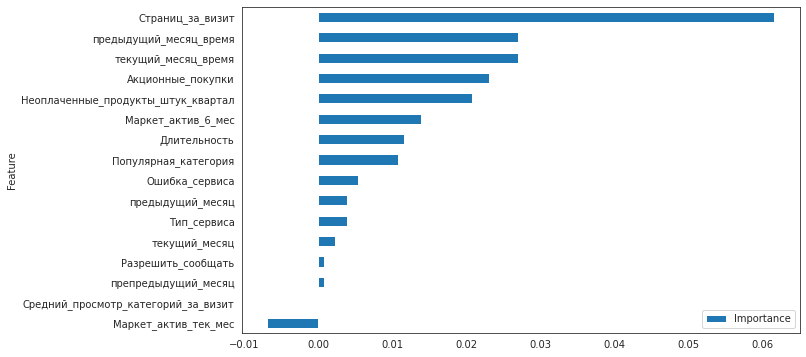

In [100]:
feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Теперь проанализируем важность признаков с помощью инструмента shap. Базис модели нелинейный поэтому необходимо выбрать нелинейный explainer

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Беру preprocessor из лучшей модели></span>


In [101]:
X_train_scaled = grid.best_estimator_.named_steps['preprocessor'].fit_transform(X_train)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Препроцессор в `grid.best_estimator_` уже обученный.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> ~~Препроцессор и классификатор (модель) нужно взять из Лучшей модели, выбранной выше (`grid.best_estimator_`)~~</font>

In [102]:
explainer = shap.KernelExplainer(grid.best_estimator_.named_steps['models'].predict_proba, shap.kmeans(X_train_scaled, 10))

In [104]:
shap_values = explainer(X_train_scaled)

  0%|          | 0/30 [00:00<?, ?it/s]

In [105]:
print(shap_values.shape)

(30, 20, 2)


In [106]:
shap_values[:,:,0].shape

(30, 20)

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span>  ❌\
<span style="color: red"> Нас интересует снижение покупательской активности, а это класс 1 ! </span>

In [107]:
columns_preproc = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

In [108]:
plt.rcParams['axes.titlesize'] = 12

plt.rcParams['axes.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 12

plt.rcParams['xtick.labelsize'] = 12

plt.rcParams['ytick.labelsize'] = 12

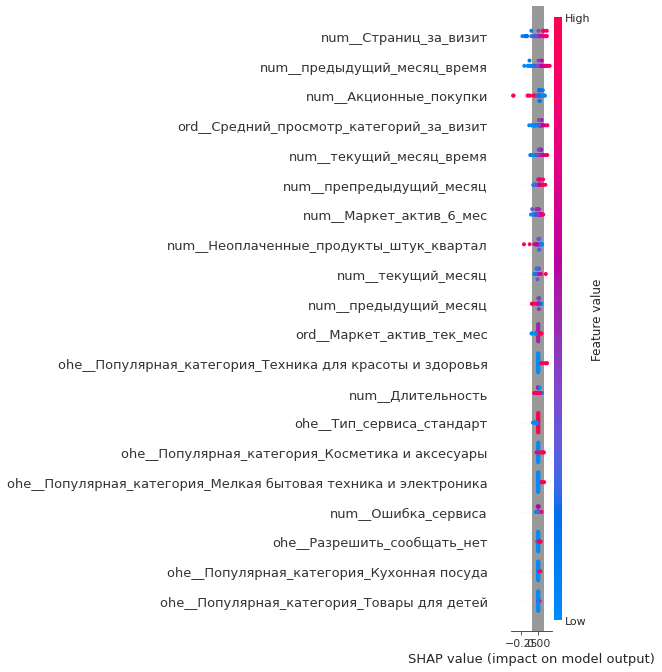

In [113]:
plt.figure(figsize=(20, 6))

shap.summary_plot(shap_values[:,:,0], X_train_scaled, feature_names=[f"Feature {i}" for i in columns_preproc])
plt.show()

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~Обрати внимание, модель принимает данные после препроцессинга, а там другие имена признаков, не X_train.columns. Сначала идут То что закодировано в OHE, затем ord_cols и num_cols (как они были перечислены в ColumnTransformer)~~</span>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Моя ошибка, исправил></span>


<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

Диаграмма shap показывает что наиболее значимыми признаками являются количество страниц за визит и время проведённое на сайте за предыдущий месяц. Также значимы средний просмотр за визит и акционные покупки. Анализ feature importance показал что ещё одной значимой категорией может быть неоплаченные продукты, но, судя по данных из shap анализа, этот признак имеет обратную корреляцию - чтобы увеличить покупательскую активность лучше этот признак уменьшить.
Какие выводы и рекомендации можно сделать на основе этого анализа?

- Человек который проводит много времени на сайте в конце концов что-нибудь закажет
- Время проведённое на сайте за предыдущий месяц влияют на покупки в дальнейшем
- Для увеличения выручки необходимо: стимулировать пользователя находится на сайте, просматривать товары.

## Сегментация

Чтобы сегментировать покупателей построим график где по одной оси располагаются вероятности того что покупательская активность снизится а по другой оси будет выручка от покупателей. Для этого используем данные из money

In [114]:
money.set_index('id', inplace=True)

In [115]:
probability = pd.DataFrame(pipe_final.predict_proba(X)[:,1])

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> Здесь то же нужна модель выбраная в `grid` </span>

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Исправил</span>


In [116]:
# X_train_money, X_test_money, y_train_money, y_test_money = train_test_split(money, y, test_size=0.2, random_state=RANDOM_STATE)


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Зачем нам делить данные?</span>

In [117]:
probability.index = money.index

ValueError: Length mismatch: Expected axis has 1297 elements, new values have 1300 elements

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span>  ❌\
<span style="color: red"> Ошибка исполнения кода. </span>

In [118]:
probability = probability.merge(money, on='id', how='left')

KeyError: 'id'

In [119]:
probability = probability.rename(columns={0 : 'prob'})

In [120]:
probability

,prob
0,0.977988
1,0.442549
2,0.887354
3,0.968253
4,0.821263
...,...
1292,0.129632
1293,0.129695
1294,0.093487
1295,0.113085


In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(probability['prob'], probability['Прибыль'])
plt.xlabel('Probability')
plt.ylabel('Выручка')
plt.show()

KeyError: 'Прибыль'

<Figure size 720x432 with 0 Axes>

Из графика видно, что можно сегментировать пользователей можно следующим образом - вероятность снижения активности больше 0.5 и выручка больше 4. Это самый выгодный сегмент и следует сконцентрироваться на нём

In [ ]:
to_improve = probability.query('prob > 0.5 and Прибыль > 3')

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [ ]:
to_improve['Прибыль'].sum() / probability['Прибыль'].sum()

Тридцать процентов выручки включают себя пользователи выручка от которых > 3, но в соответствии с анализом у этих пользователей есть вероятность снизить активность.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red">Далее следует определить группу клиентов из сегмента (например по акционным покупкам) и сравниваем этих клиентов со всеми остальньнымим по другим факторам, для выявления различий (можно строить парные графики или накладывать гистограммы). На основании сравнения формируем рекомендации.</span>

In [ ]:
X_money_improve = X.loc[to_improve.index]

In [ ]:
X_money_improve

In [ ]:
y_new = pipe_final.predict(X_money_improve)

In [ ]:
print(pd.DataFrame(y_new).value_counts(normalize=True))

In [ ]:
X_money_improve['Длительность'] += 1000

In [ ]:
X_money_improve['Неоплаченные_продукты_штук_квартал'] -= 5

In [ ]:
X_money_improve['препредыдущий_месяц'] += 1500

In [ ]:
X_money_improve

In [ ]:
y_new = pipe_final.predict(X_money_improve)

In [ ]:
print(pd.DataFrame(y_new).value_counts(normalize=True))

Из анализа видно что при увеличении длительности нахождения на сайте, уменьшения количества неоплаченных продуктов (связь с неоплаченными продуктами оказалась обратной) и увеличении активности за предыдущий месяц можно уменьшить процент пользователей с высокой долей прибыли склонных к снижению активности примерно на 50%

Комментарий студента: </span><br><span style="color: purple; font-weight: bold">Провожу сегментацию данных</span>


Проведём сегментирование клиентов по основным значимым признакам - страниц за визит, предыдущий месяц время и акционные покупки

In [ ]:
plt.figure(figsize=(10, 6))
market_all['Акционные_покупки'].hist(bins=100)
plt.show()

In [ ]:
market_all

In [ ]:
bins = [0, 5, 7, 10, 30]
labels = ['до 5', '5-7', '7-10', '10+']
market_all['pages_group'] = pd.cut(market_all['Страниц_за_визит'], bins=bins, labels=labels)

In [ ]:
bins = [0, 7.5, 12.5, 20, 30]
labels = ['до 7.5', '7.5-12.5', '12.5-20', '20+']
market_all['time_group'] = pd.cut(market_all['предыдущий_месяц_время'], bins=bins, labels=labels)

In [ ]:
bins = [0, 0.2, 0.4, 10]
labels = ['до 0.2', '0.2-0.4', '0.4+']
market_all['act_group'] = pd.cut(market_all['Акционные_покупки'], bins=bins, labels=labels)

In [ ]:
pivot = market_all.pivot_table(
    index=['time_group'],
    columns='pages_group',
    values=['текущий_месяц'],
    aggfunc='mean',
    fill_value=0
)

In [ ]:
pivot

In [ ]:
pivot = market_all.pivot_table(
    index=['act_group'],
    columns='time_group',
    values=['текущий_месяц'],
    aggfunc='mean',
    fill_value=0
)

In [ ]:
pivot

Анализ показывает что пользователи проводящие много времени на сайте и открывающие мало страниц наименее прибыльны. Напротив пользователи быстро принимающие решения просмотрев максимум страниц самые выгодные. Делаем вывод - наилучшая стратегия - предлагать пользователю несколько вариантов и стимулировать к быстрому принятию решения (скидки последний днь etc)

## Общие выводы по работе

В результате проведённой работы привожу выводы и рекомендации
- После обработки данных и проведённого поиска подходящей модели была выбрана модель с наилучшей точности по валидационной и тестовой выборкам - SVC (support vector classifier). Точность - около 92%
- После получения модели был проведён анализ важности признаков. Анализ показал что важность признаков - если её определять разными способами примерно одинакова. Важнейшие признаки - количество страниц за визит, время проведённое на сайте за предыдущий месяц и за текущий месяц. Также важны количество денег потраченное пользователем за предыдущий месяц и длительность времени проведённое на сайте
- На основе анализа данных проведена сегментация, выделены наиболее важные с точки зрения выручки и лояльности пользователи, проведён анализ их активности, проведена симуляция различных стратегий улучшения их покупательской активности
- Покупательскую активность таргетной группы можно увеличить - удерживать пользователя на сайте как можно дольше, стимулировать его не оставлять покупки в корзине. Также необходимо сконцентрироваться на лояльных покупателях - тех у кого велики траты в предыдущие и предпредыдущие месяцы
- Анализ сегментов показал чточто пользователи проводящие много времени на сайте и открывающие мало страниц наименее прибыльны. Напротив пользователи быстро принимающие решения просмотрев максимум страниц самые выгодные. Делаем вывод - наилучшая стратегия - предлагать пользователю несколько вариантов и стимулировать к быстрому принятию решения (скидки последний днь etc)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Павел, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Павел, большое спасибо за доработку.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>